In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

from src.ExistingAlgorithms import max_value, area
from src.GaussianMixture import gaussian_mixture

PATH_LD = 'src/Results TES (Uniform)/Low Dimension'
PATH_DATA = '/home/nicolasdc/Documents/Dataset/NIST'
data_train = np.load(f'{PATH_DATA}/uniform_train.npy')
data_test = np.load(f'{PATH_DATA}/uniform_test.npy')
expected_prob = np.load(f'{PATH_DATA}/uniform_expected_prob.npy')

# Before Running

In the first cell some variables are defined to guarantee the code will run without issues on your machine.

## STYLE

A version for Linux and Windows was created for the plot style.
These styles consider `latex` is installed on the machine.

Define the variable :

In [2]:
STYLE = 'src/custom_linux.mplstyle' # Linux
# STYLE = 'src/custom_windows.mplstyle' # Windows


## LATEX

Figures are generated to allow formatting with latex files.
If `latex` is not installed on your device just set the `LATEX` variable to `False`.

In [3]:
LATEX = True

## Context

Transition edge sensors are used for a variety of applications and amazing work has been done to improve there performance.
The measurement process relies on a, usually numerical, step that will assign photon numbers to specific famillies of voltage signals generated by these sensors.

The goal of this work is to explore a variety of dimensionality redduction techniques that creates interpretable embeddings for photon numbers.
In these spaces certain features become more apparent (noise, photon number, ...) and clustering beacomes a simple task.


## Historical Methods

### Maximum value

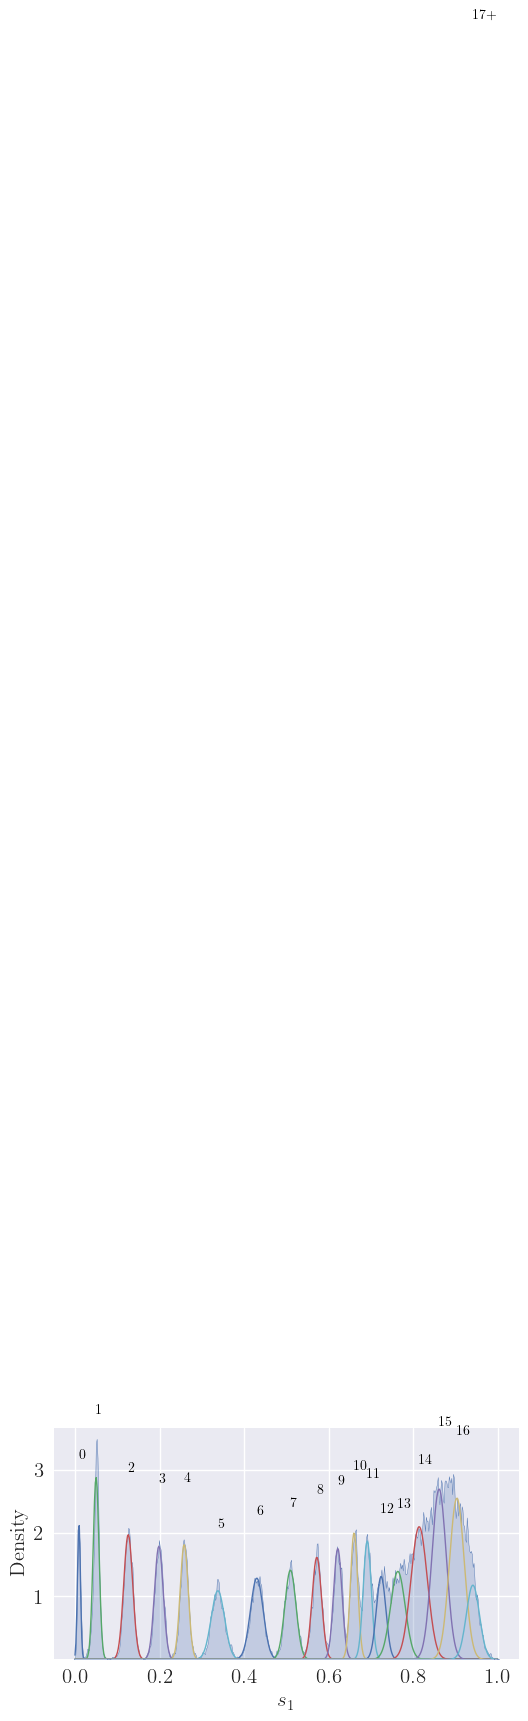

In [4]:
X_l_MAX = max_value(data_test, filtering=True)

gm = gaussian_mixture(X_l_MAX, 
                    data_test,
                    means_init = None,
                    number_cluster = 18,
                    cluster_iter = 10,
                    info_sweep = 0,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 3,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians = True,
                plot_scale = 'linear')

### Area

In [5]:
X_l_AREA  = area(data_test, filtering = True, plot_filter = False, threshold = 0.04)

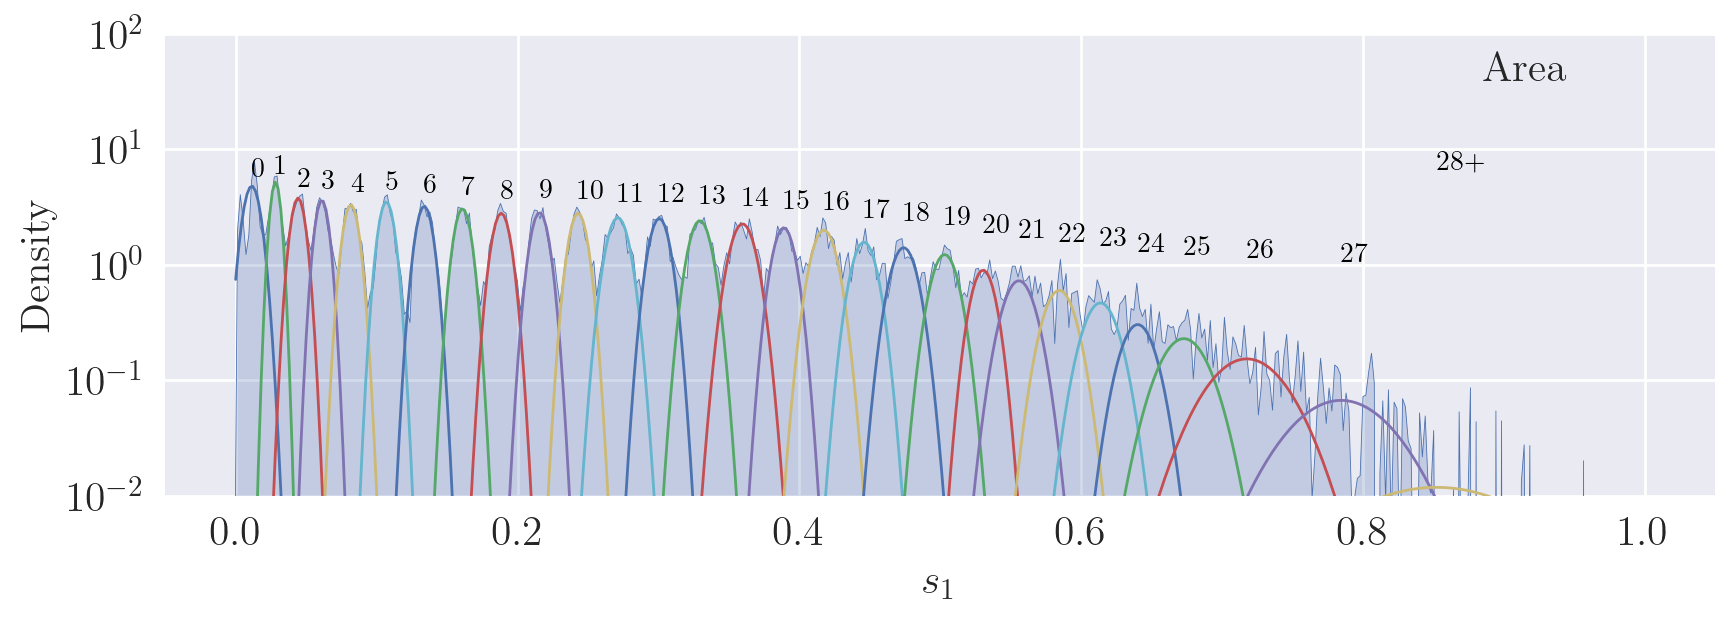

In [6]:
gm = gaussian_mixture(X_l_AREA,
                    data_test,
                    means_init = None,
                    number_cluster = 29,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 10,
                    height_plot = 3,
                    dpi = 200,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.01,
                plot_gaussians=True,
                plot_scale='log',
                text = 'Area',
                save_path = 'assets')

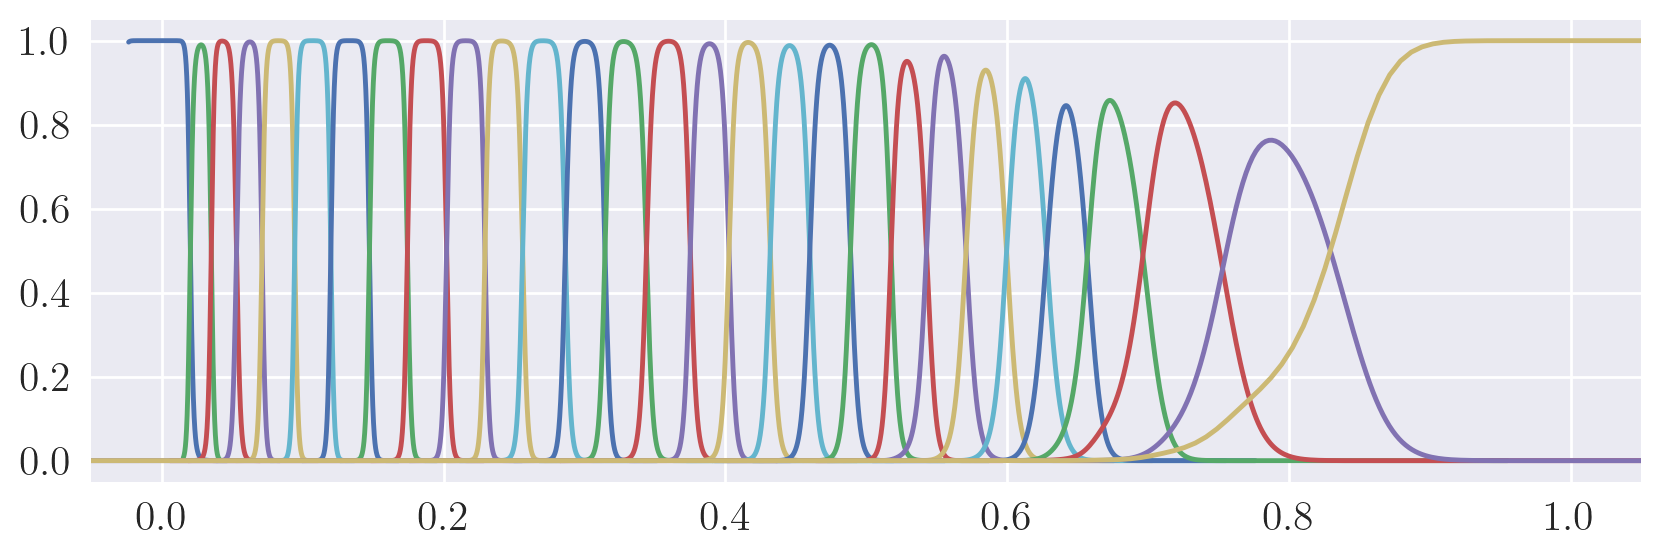

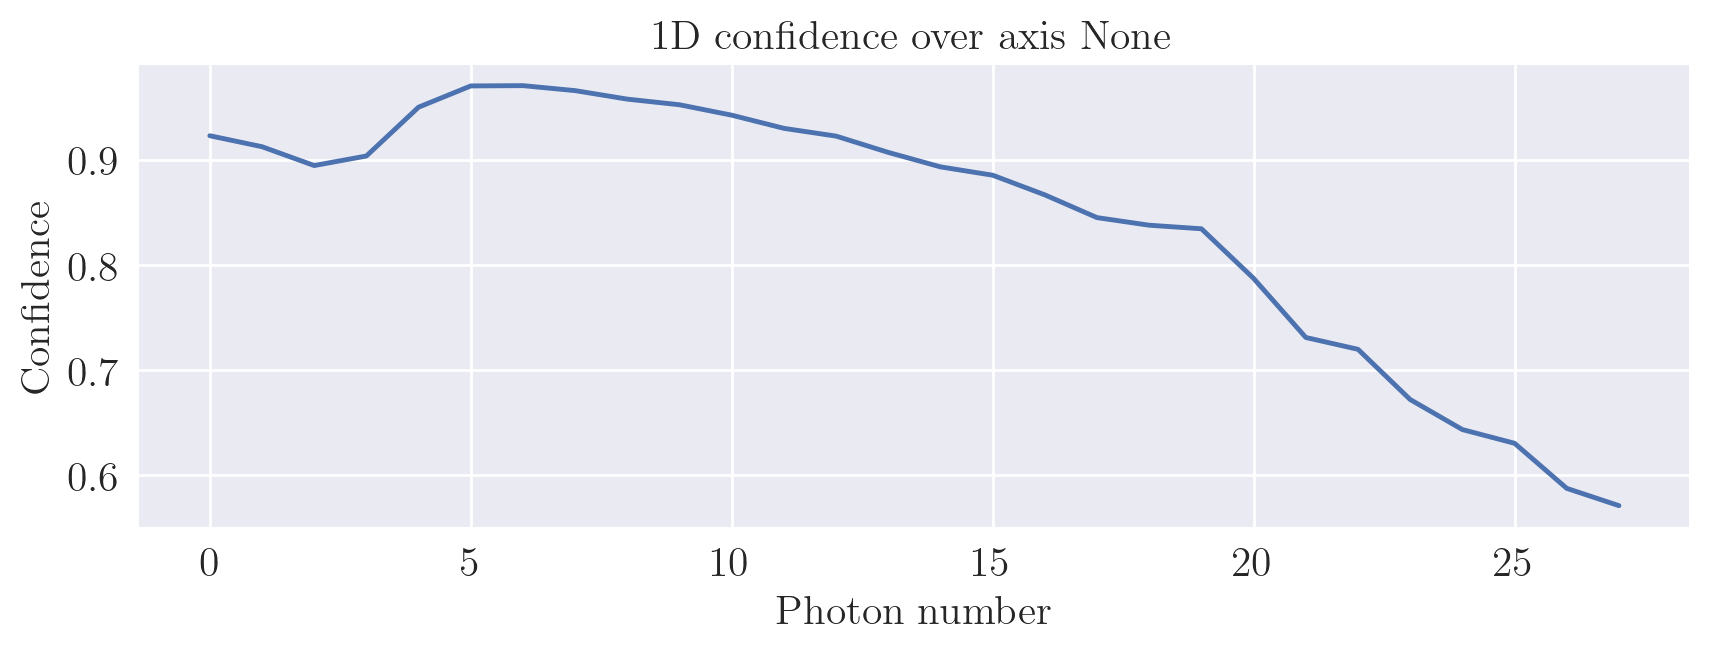

In [7]:
gm.plot_confidence_1d(expected_prob = expected_prob,
                        axis = None,
                        n_points = 1000,
                        size_zone = 1000.,
                        plot_int = True,
                        function = 'gauss')

### PCA

In [7]:
file_ = '/PCA_{n_components 1}.npy'
X_l_PCA = np.load(f"{PATH_LD}{file_}")

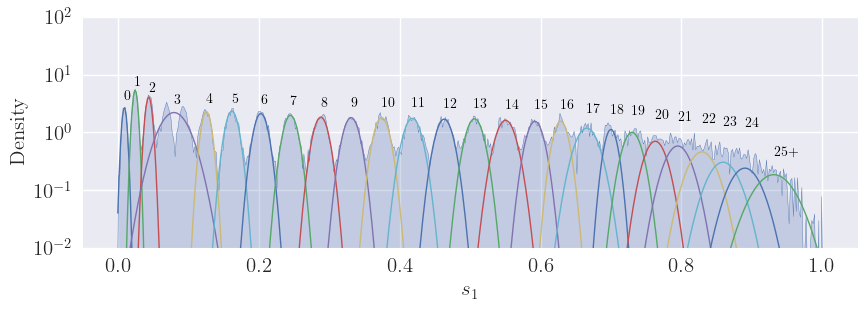

In [8]:
gm = gaussian_mixture(X_l_PCA,
                    data_test,
                    means_init = None,
                    number_cluster = 26,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 10,
                    height_plot = 3,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.01,
                plot_gaussians=True,
                plot_scale='log')


In [11]:
file_ = '/TSNE_{n_components 1, perplexity 450}.npy'
X_l_TSNE = np.load(f"{PATH_LD}{file_}")

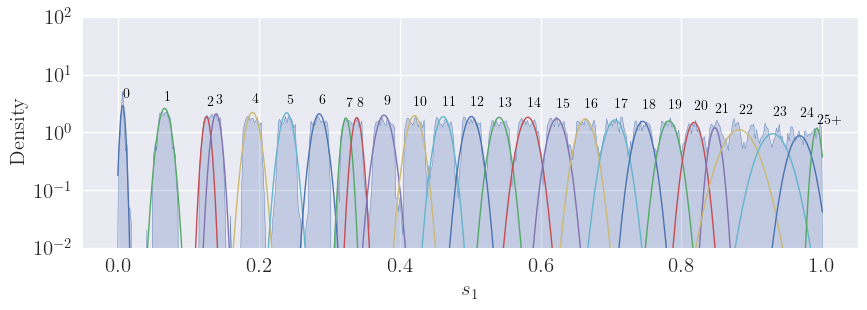

In [12]:
gm = gaussian_mixture(X_l_TSNE,
                    data_test,
                    means_init = None,
                    number_cluster = 26,
                    cluster_iter = 10,
                    info_smulti_gaussian[index,:,:] = weight * multivariate_normal(mean = mean, cov = covariance).pdf(pos)weep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 10,
                    height_plot = 3,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.01,
                plot_gaussians=True,
                plot_scale='log')

### Example figures

In [ ]:
weights = [1]

 = dataset_TES(weights = weights,
                                                path_test = r'C:\Users\dalbe\Documents\Backup datasets\TES\NIST test/',
                                                path_train = r'C:\Users\dalbe\Documents\Backup datasets\TES\NIST train/',
                                                signal_size = 8192,
                                                interval = [0,350],#270],
                                                order_dB = False,
                                                normalize = True,
                                                plot_expected = False,
                                                plot_traces = False,
                                                n_photon_number = 50)

In [3]:
X_l_MAX = max_value(data_test, filter=True)
condition = X_l_MAX[:,0] < 1

In [ ]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,3), dpi=100)
    plt.plot(data_test.T[:,condition][:100,::20],
                alpha = 0.05,
                linewidth = 1)
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Voltage (a.u.)')
    plt.show()

In [ ]:
name_method = 'MAX'
gm = gaussian_mixture(X_l_MAX[condition], 
                    data_test[condition],
                    means_init = np.array([0,.1,.2,.3,.4,.5,.7,.8,.9,1]).reshape(-1,1),
                    number_cluster = 10,
                    cluster_iter = 10,
                    info_sweep = 0,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 3,
                    dpi = 100)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians=False,
                plot_scale='linear')

In [ ]:
hist, x = np.histogram(gm.labels, bins=9)
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,3), dpi=100)
    plt.bar(x[:-1], hist, alpha = 0.5)
    plt.locator_params(nbins=10)
    plt.ylabel('Counts')
    plt.xlabel('Photon number')
    
    plt.show()